# Расчёт длинной линии

Подключение основных библиотек, необходимых для дальнейшего расчёта:

In [21]:
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt

## Задача №1
Пусть линия с волновым сопротивлением р нагружена на активное сопротивление Rн (или реактивное сопротивление Хн). Нарисовать графики эпюр распределения амплитуд напряжения и тока вдоль линии. Определить входное сопротивление на заданном расстоянии от нагрузки z.

Определим основные переменные задачи.

In [22]:
# i1 = complex(0,1)
i1 = 1j
lmd = 1
W = 50

Rn = W * 1
Xn = W * 0.5
# Zn = complex(Rn, Xn)
Zn = Rn + Xn*1j # нормировано к W
z = 0.3 * lmd

Определим функцию, вычисляющую значение входного сопротивления:

In [34]:
def InputImp(Zn, z):
    return W*(Zn + 1j*W*math.tan(2*math.pi*z/lmd))/(W+1j*Zn*math.tan(2*math.pi*z/lmd))

Рассчитаем значение входного сопротивления для исходных параметров задачи:

In [35]:
Zin = InputImp(Zn, z)
print('Значение входного сопротивления Zin = %f + %fj' %(Zin.real, Zin.imag))

Значение входного сопротивления Zin = 32.894309 + -10.889179j


Найдём значения коэффициента отражения, КБВ и КСВ.

In [25]:
Gamma = (Zn - W)/(Zn + W)
aG = abs(Gamma)
Kbv = (1-aG)/(1+aG)
Ksv = 1/Kbv

print('Коэффициент отражения |Г| = %f' %aG)
print('Коэффициент бегущей волны Кбв = %f' %Kbv)
print('Коэффициент стоящей волны Ксв = %f' %Ksv)

Коэффициент отражения |Г| = 0.242536
Коэффициент бегущей волны Кбв = 0.609612
Коэффициент стоящей волны Ксв = 1.640388


## Эпюры напряжения и тока вдоль линии
Зададим напряжение на нагрузке 1В.

In [26]:
Un = 1
In = Un/Zn

print('In = %f + %fj' %(In.real, In.imag))

In = 0.016000 + -0.008000j


Определим функцию, вычисляющую значения напряжения и тока в заданном сечении линии.

In [27]:
def VI(z):
    cosbz = math.cos(2*math.pi*z/lmd)
    sinbz = math.sin(2*math.pi*z/lmd)
    U = Un*cosbz + i1*In*W*sinbz
    I = In*cosbz + i1*Un*sinbz/W
    return(U,I)

#uz,iz = VI(5)
#print(iz)

Определим массив точек, для которых будут рассчитаны значения напряжения и тока в линии.

In [28]:
N = 101
L = 2 * lmd
dl = L/(N-1)
zl = np.zeros(N)
for i in range (0, N):
    zl[i] = i*dl
#print(zl)

Рассчитаем массивы значений напряжения и тока.

In [29]:
U = np.zeros(N)
I = np.zeros(N)

for i in range(0, N):
    uu,ii = VI(zl[i])
    U[i] = abs(uu)
    I[i] = abs(ii)

#print(U)

Рассчитаем Ксв и Кбв по фактическим значениям напряжения.

In [30]:
Ksv_fact = max(U)/min(U)
Kbv_fact = 1/Ksv_fact

print('Кбв = %f' %Kbv_fact)
print('Ксв = %f' %Ksv_fact)

Кбв = 0.610252
Ксв = 1.638667


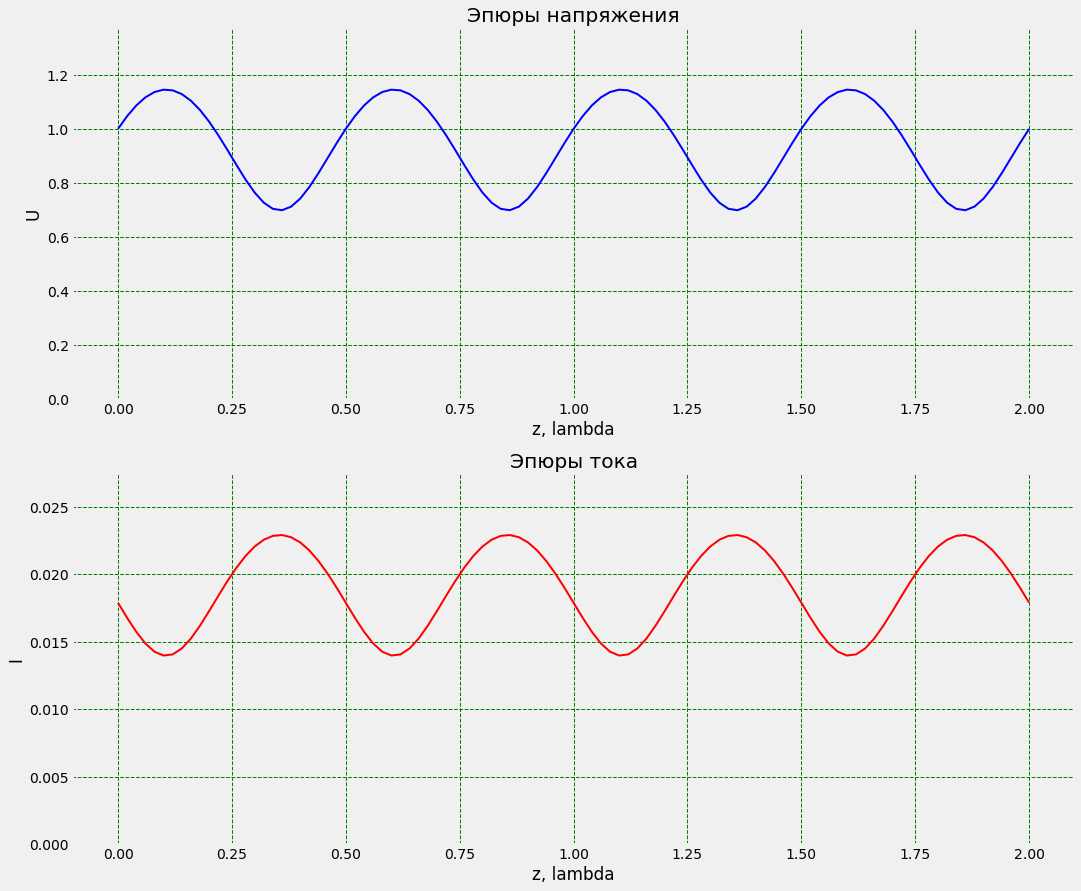

In [31]:
plt.style.use('fivethirtyeight')

fig, axes = plt.subplots(2, 1, figsize=(16, 14)) # figsize(,) задаёт размер картинки
axes[0].plot(zl, U, color='blue', linewidth=2, linestyle='-', label="|U(z)|") #labels=['DN(Theta)', '-', '-'])
axes[1].plot(zl, I, color='red', linewidth=2, linestyle='-', label="|I(z)|") 
axes[0].set_title('Эпюры напряжения')
axes[1].set_title('Эпюры тока')
#axes.legend(loc='upper left')
axes[0].set_xlabel('z, lambda')
axes[1].set_xlabel('z, lambda')
axes[0].set_ylabel('U')
axes[1].set_ylabel('I')
#axes[0].grid(True)
#axes.set_xlim(xmin=-90, xmax=90)    #ax.set_xlim(xmin=theta[0], xmax=theta[-1])
axes[0].set_ylim(ymin=0, ymax=max(U)*1.2)
axes[1].set_ylim(ymin=0, ymax=max(I)*1.2)
axes[0].grid(True, axis='y', color='green', linewidth=1, linestyle='--')
axes[1].grid(True, axis='y', color='green', linewidth=1, linestyle='--')
axes[0].grid(True, axis='x', color='green', linewidth=1, linestyle='--')
axes[1].grid(True, axis='x', color='green', linewidth=1, linestyle='--')
#fig.tight_layout()